In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("synthetic_food_dataset_imbalanced.csv")

print("Columns and data types:")
print(df.dtypes)

Columns and data types:
Calories              float64
Protein               float64
Fat                   float64
Carbs                 float64
Sugar                 float64
Fiber                 float64
Sodium                float64
Cholesterol           float64
Glycemic_Index        float64
Water_Content         float64
Serving_Size          float64
Meal_Type              object
Preparation_Method     object
Is_Vegan                 bool
Is_Gluten_Free           bool
Food_Name              object
dtype: object


In [56]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,31325.0,273.378441,111.457160,60.786204,210.301731,281.774249,329.821946,1289.956763
Protein,31325.0,9.523802,8.024212,0.000000,3.858307,9.091637,12.683957,81.761772
Fat,31325.0,12.476848,8.425834,0.000000,8.245636,11.574161,15.818611,88.619611
Carbs,31325.0,28.943200,12.668795,0.000000,25.098800,29.681430,34.635789,140.585537
Sugar,31325.0,8.543813,7.989075,0.000000,3.739656,5.500479,14.426303,78.548162
Fiber,31325.0,1.904044,1.779542,0.000000,0.741204,1.646608,2.668750,18.891993
Sodium,31325.0,335.387611,319.066106,0.000000,63.000654,292.525242,631.367901,2724.236846
Cholesterol,31325.0,26.865167,24.965067,0.000000,12.701920,23.285882,35.132214,260.149443
Glycemic_Index,31325.0,64.213509,25.390239,0.000000,59.984731,68.436204,75.464697,286.126400
Water_Content,31325.0,48.976592,20.738749,13.465039,38.994221,45.613748,52.399496,251.837472


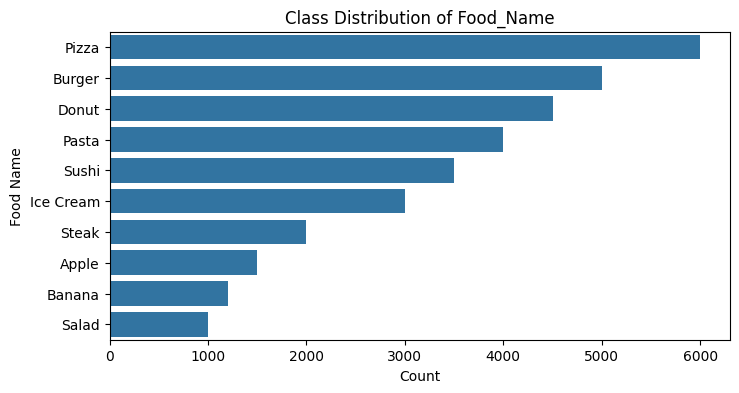

In [58]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='Food_Name', order=df['Food_Name'].value_counts().index)
plt.title("Class Distribution of Food_Name")
plt.xlabel("Count")
plt.ylabel("Food Name")
plt.show()

In [59]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Handle missing values: Impute missing numeric features with median
num_cols = df.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

#Detect and cap outliers using the 1st and 99th percentiles for each numeric feature
for col in num_cols:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = df[col].clip(lower, upper)

#Remove duplicate entries (across all columns)
initial_shape = df.shape
df = df.drop_duplicates()
print(f"Removed {initial_shape[0] - df.shape[0]} duplicate rows.")

#Normalize (standardize) numerical features (mean=0, std=1)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

#Show processed data info
print("Preprocessing complete!")
print(df.head())



Removed 313 duplicate rows.
Preprocessing complete!
   Calories   Protein       Fat     Carbs     Sugar     Fiber    Sodium  \
0  0.247264  0.807481  0.303031  0.676909 -0.533244 -0.401272  1.178752   
1 -0.651200 -0.812321 -0.079987 -0.520310  1.271203 -1.265271 -0.937144   
2  0.711655  0.805369  1.149730  0.101788 -0.310330 -0.771058  1.235830   
3 -0.819218  0.035781 -1.010010  0.362018 -0.821994 -0.089466 -0.088649   
4  0.062953 -0.493602  0.621336  0.129361  1.428648 -0.271617 -0.104855   

   Cholesterol  Glycemic_Index  Water_Content  Serving_Size Meal_Type  \
0    -0.046733        0.906050      -0.160314      1.112300    dinner   
1     0.436905        0.310645       0.111815     -1.034753     snack   
2     0.463664       -0.033660      -0.520281      1.144810     snack   
3     0.136134        0.269465       0.603955     -0.304520     lunch   
4    -0.544695        0.353253      -0.972977     -1.740554     snack   

  Preparation_Method  Is_Vegan  Is_Gluten_Free  Food_Name 

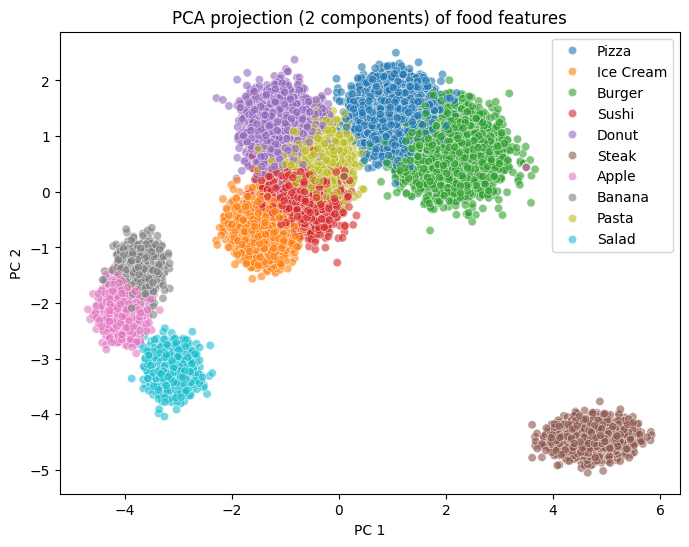

In [60]:
from sklearn.decomposition import PCA

# Select numeric columns only (features)
X_numeric = df.select_dtypes(include='number').drop(columns=[])  # Already standardized

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numeric)

# Plot PCA result colored by Food_Name
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Food_Name'], alpha=0.6, palette='tab10')
plt.title('PCA projection (2 components) of food features')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# PCA for modeling:
#pca = PCA(n_components=)
#X_pca_full = pca.fit_transform(X_numeric)

In [61]:
from sklearn.preprocessing import LabelEncoder

# Encode Food_Name as integer labels for classification
le = LabelEncoder()
df['Food_Name_Code'] = le.fit_transform(df['Food_Name'])

# To see mapping:
food_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label encoding mapping:", food_name_mapping)

categorical_cols = ['Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free']
X = df.drop(columns=['Food_Name', 'Food_Name_Code'])
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
y = df['Food_Name_Code']


Label encoding mapping: {'Apple': np.int64(0), 'Banana': np.int64(1), 'Burger': np.int64(2), 'Donut': np.int64(3), 'Ice Cream': np.int64(4), 'Pasta': np.int64(5), 'Pizza': np.int64(6), 'Salad': np.int64(7), 'Steak': np.int64(8), 'Sushi': np.int64(9)}


In [68]:
from sklearn.decomposition import PCA

# Prepare numeric features (already standardized), drop target code
X_numeric = df.select_dtypes(include='number').drop(columns=['Food_Name_Code'])

# Fit PCA (example: 10 components)
pca = PCA(n_components=10)
X_pca_full = pca.fit_transform(X_numeric)

# Split PCA features for training/testing
#X_train, X_test, y_train, y_test = train_test_split(
#    X_pca_full, y, test_size=0.2, random_state=42, stratify=y
#)


In [69]:
#Save the cleaned data to a new CSV file
df.to_csv("cleaned_food_dataset.csv", index=False)
print("Cleaned data saved to cleaned_food_dataset.csv")

Cleaned data saved to cleaned_food_dataset.csv


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Drop columns not needed for ML (the text target, any IDs, etc.)
#X = df.drop(columns=['Food_Name', 'Food_Name_Code'])  # You may also drop other non-feature columns
#y = df['Food_Name_Code']

# Split into train and test sets (stratified for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'model': model,
        'y_pred': y_pred
    }
    print(f"Trained {name}")


Train shape: (25109, 19) Test shape: (6278, 19)
Trained Logistic Regression
Trained Decision Tree
Trained Random Forest
Trained KNN
Trained SVM


/Users/mambaforever/Guvi/Nutri_Classification/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Trained XGBoost
Trained Gradient Boosting



Logistic Regression:
Accuracy: 0.9910799617712648
              precision    recall  f1-score   support

       Apple       0.98      0.98      0.98       297
      Banana       0.97      0.98      0.97       239
      Burger       0.98      0.98      0.98       988
       Donut       1.00      1.00      1.00       893
   Ice Cream       1.00      1.00      1.00       594
       Pasta       0.99      0.99      0.99       795
       Pizza       0.99      0.99      0.99      1183
       Salad       1.00      0.99      1.00       199
       Steak       1.00      1.00      1.00       398
       Sushi       1.00      1.00      1.00       692

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278



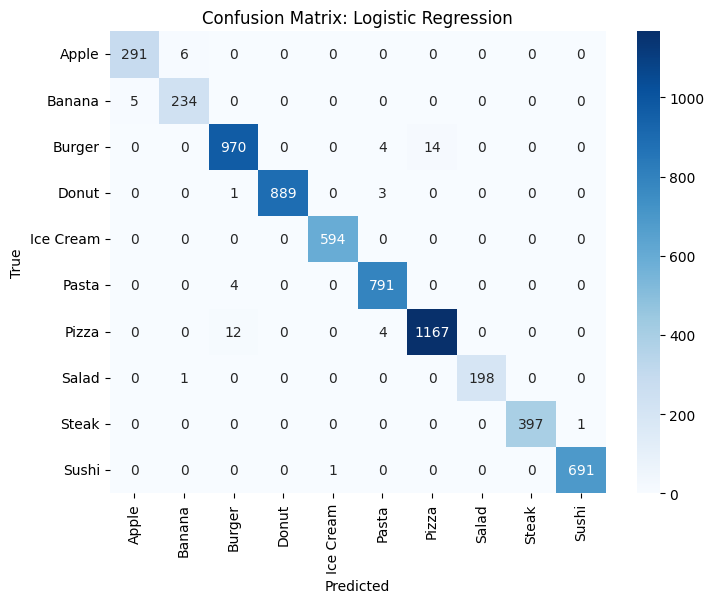


Decision Tree:
Accuracy: 0.9859827970691303
              precision    recall  f1-score   support

       Apple       0.97      0.99      0.98       297
      Banana       0.98      0.97      0.97       239
      Burger       0.97      0.96      0.97       988
       Donut       0.99      1.00      0.99       893
   Ice Cream       0.99      1.00      1.00       594
       Pasta       1.00      0.99      1.00       795
       Pizza       0.97      0.98      0.98      1183
       Salad       1.00      0.99      1.00       199
       Steak       1.00      1.00      1.00       398
       Sushi       1.00      1.00      1.00       692

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278



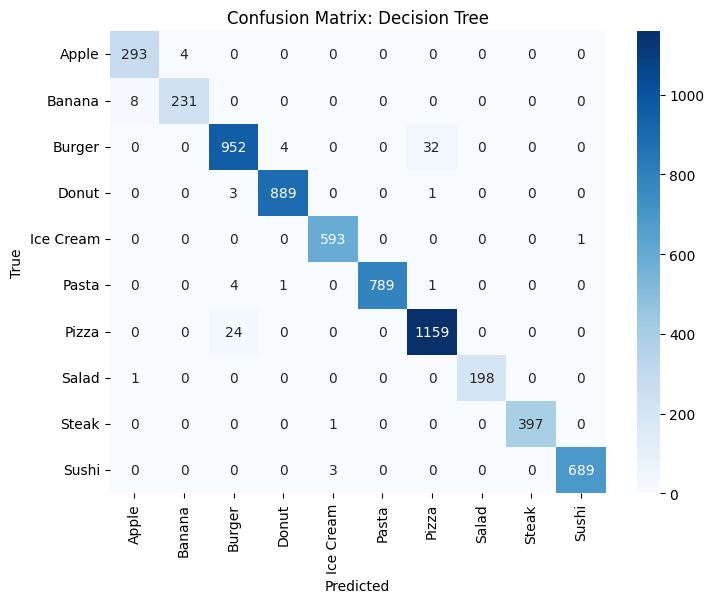


Random Forest:
Accuracy: 0.9921949665498566
              precision    recall  f1-score   support

       Apple       0.99      0.99      0.99       297
      Banana       0.98      0.99      0.99       239
      Burger       0.98      0.99      0.98       988
       Donut       1.00      1.00      1.00       893
   Ice Cream       0.99      1.00      1.00       594
       Pasta       1.00      0.99      0.99       795
       Pizza       0.99      0.99      0.99      1183
       Salad       0.99      0.99      0.99       199
       Steak       1.00      1.00      1.00       398
       Sushi       1.00      1.00      1.00       692

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278



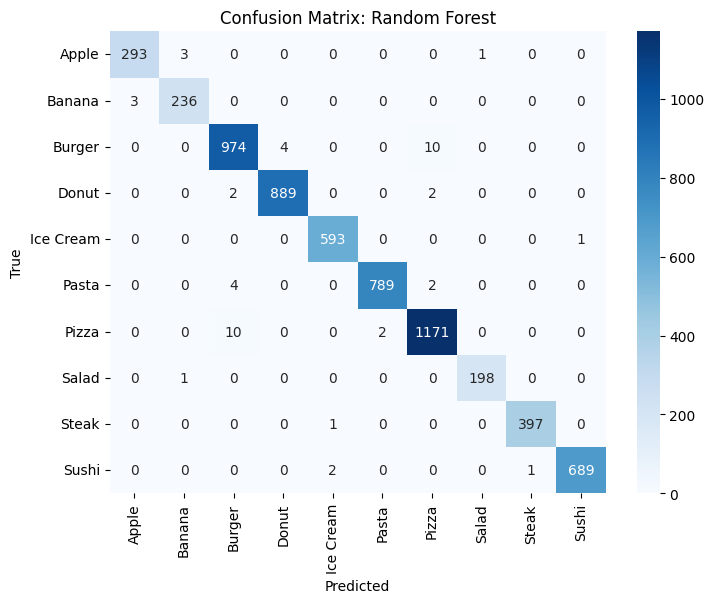


KNN:
Accuracy: 0.9906021025804397
              precision    recall  f1-score   support

       Apple       0.99      0.98      0.99       297
      Banana       0.99      0.99      0.99       239
      Burger       0.98      0.97      0.98       988
       Donut       1.00      1.00      1.00       893
   Ice Cream       0.99      1.00      1.00       594
       Pasta       1.00      0.99      0.99       795
       Pizza       0.98      0.99      0.98      1183
       Salad       0.99      0.99      0.99       199
       Steak       0.99      1.00      1.00       398
       Sushi       1.00      1.00      1.00       692

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278



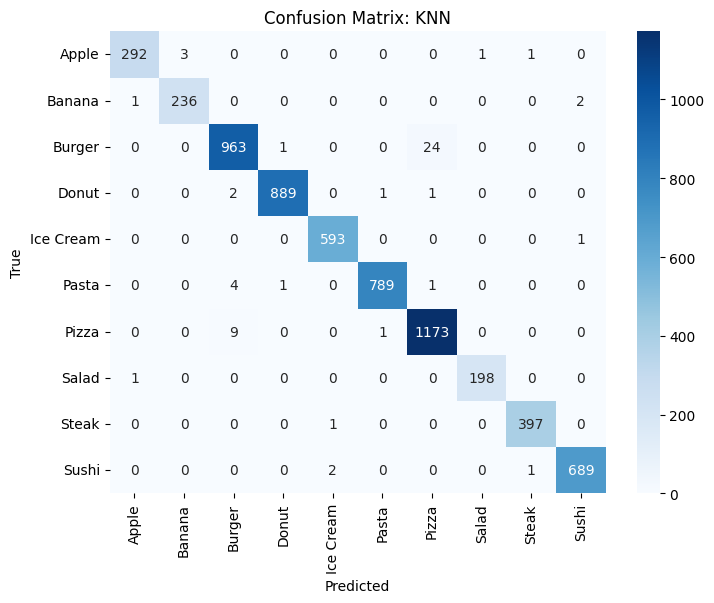


SVM:
Accuracy: 0.9944249761070405
              precision    recall  f1-score   support

       Apple       0.99      1.00      0.99       297
      Banana       1.00      0.99      0.99       239
      Burger       1.00      0.99      0.99       988
       Donut       1.00      1.00      1.00       893
   Ice Cream       1.00      1.00      1.00       594
       Pasta       0.99      0.99      0.99       795
       Pizza       0.99      0.99      0.99      1183
       Salad       1.00      0.99      1.00       199
       Steak       1.00      1.00      1.00       398
       Sushi       1.00      1.00      1.00       692

    accuracy                           0.99      6278
   macro avg       1.00      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278



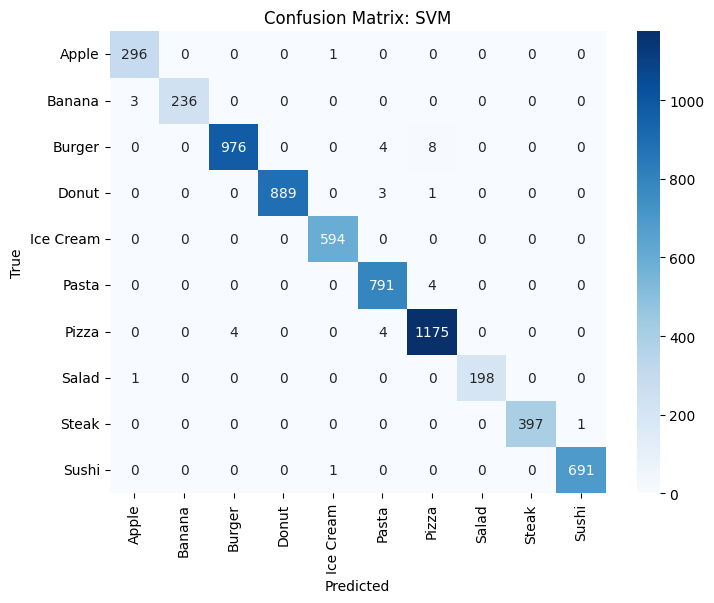


XGBoost:
Accuracy: 0.9928321121376235
              precision    recall  f1-score   support

       Apple       0.99      0.99      0.99       297
      Banana       0.99      0.98      0.99       239
      Burger       0.99      0.99      0.99       988
       Donut       1.00      1.00      1.00       893
   Ice Cream       0.99      1.00      1.00       594
       Pasta       0.99      0.99      0.99       795
       Pizza       0.99      0.99      0.99      1183
       Salad       0.99      1.00      1.00       199
       Steak       1.00      1.00      1.00       398
       Sushi       1.00      1.00      1.00       692

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278



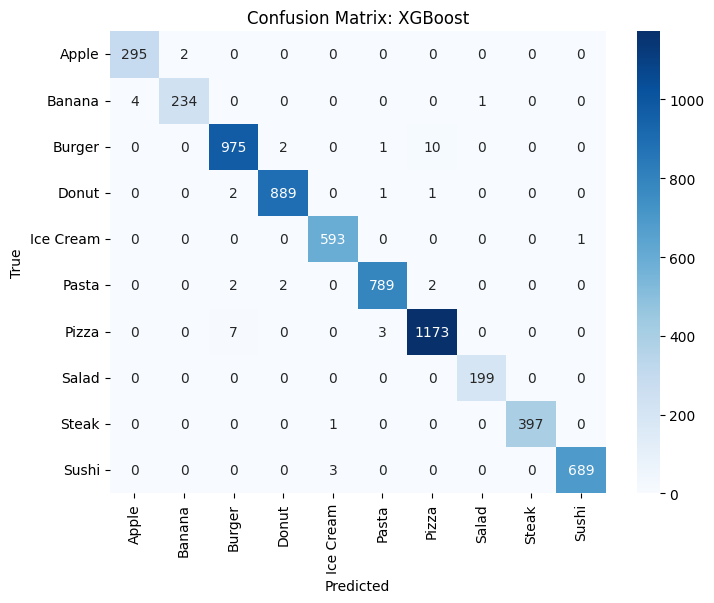


Gradient Boosting:
Accuracy: 0.9934692577253903
              precision    recall  f1-score   support

       Apple       0.99      0.99      0.99       297
      Banana       0.99      0.98      0.99       239
      Burger       1.00      0.99      0.99       988
       Donut       1.00      0.99      1.00       893
   Ice Cream       0.99      1.00      1.00       594
       Pasta       0.99      0.99      0.99       795
       Pizza       0.99      0.99      0.99      1183
       Salad       0.99      1.00      0.99       199
       Steak       1.00      1.00      1.00       398
       Sushi       1.00      1.00      1.00       692

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278



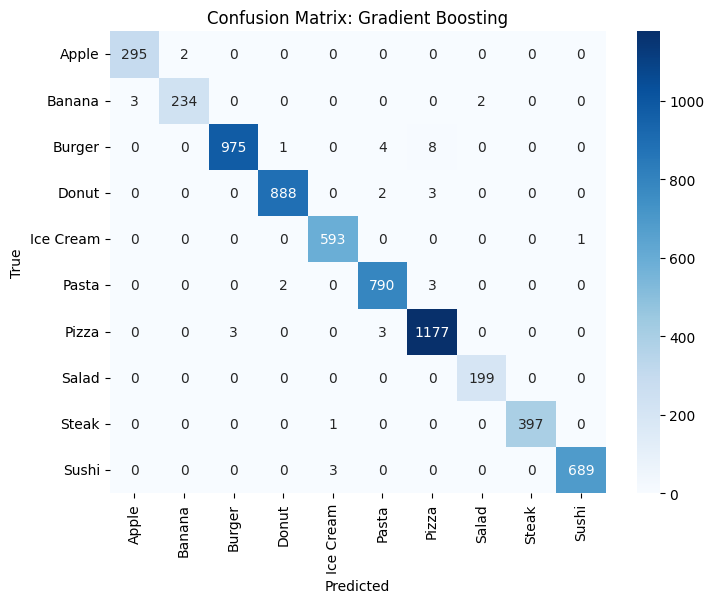

,Model,Accuracy
4,SVM,0.994425
6,Gradient Boosting,0.993469
5,XGBoost,0.992832
2,Random Forest,0.992195
0,Logistic Regression,0.991080
3,KNN,0.990602
1,Decision Tree,0.985983


In [71]:
# Get mapping for class labels to food names
target_names = list(df['Food_Name'].unique())
target_names = sorted(target_names, key=lambda x: df[df['Food_Name'] == x]['Food_Name_Code'].iloc[0])

summary_table = []

for name, res in results.items():
    print(f"\n{name}:")
    acc = accuracy_score(y_test, res['y_pred'])
    print("Accuracy:", acc)
    print(classification_report(y_test, res['y_pred'], target_names=target_names))
    
    summary_table.append({
        "Model": name,
        "Accuracy": acc
    })

    # Plot confusion matrix
    cm = confusion_matrix(y_test, res['y_pred'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Summary table as DataFrame
pd.DataFrame(summary_table).sort_values("Accuracy", ascending=False)


In [74]:
import pandas as pd
import os

output_dir = "model_results"
os.makedirs(output_dir, exist_ok=True)

# Collect accuracy for each model
summary_table = []
for name, res in results.items():
    acc = accuracy_score(y_test, res['y_pred'])
    summary_table.append({
        "Model": name,
        "Accuracy": acc
    })

# Save as CSV in the output folder
summary_df = pd.DataFrame(summary_table)
summary_df.to_csv(os.path.join(output_dir, "model_summary_metrics.csv"), index=False)
print("Model summary metrics saved to model_results/model_summary_metrics.csv")

# Save per-model classification reports to output folder
from sklearn.metrics import classification_report

for name, res in results.items():
    report_dict = classification_report(y_test, res['y_pred'], target_names=target_names, output_dict=True)
    report_df = pd.DataFrame(report_dict).T
    report_df.to_csv(os.path.join(output_dir, f"classification_report_{name.replace(' ', '_')}.csv"))
    print(f"Classification report for {name} saved to model_results/classification_report_{name.replace(' ', '_')}.csv")

from sklearn.metrics import confusion_matrix

for name, res in results.items():
    cm = confusion_matrix(y_test, res['y_pred'])
    cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)
    cm_df.to_csv(os.path.join(output_dir, f"confusion_matrix_{name.replace(' ', '_')}.csv"))
    print(f"Confusion matrix for {name} saved to model_results/confusion_matrix_{name.replace(' ', '_')}.csv")


Model summary metrics saved to model_results/model_summary_metrics.csv
Classification report for Logistic Regression saved to model_results/classification_report_Logistic_Regression.csv
Classification report for Decision Tree saved to model_results/classification_report_Decision_Tree.csv
Classification report for Random Forest saved to model_results/classification_report_Random_Forest.csv
Classification report for KNN saved to model_results/classification_report_KNN.csv
Classification report for SVM saved to model_results/classification_report_SVM.csv
Classification report for XGBoost saved to model_results/classification_report_XGBoost.csv
Classification report for Gradient Boosting saved to model_results/classification_report_Gradient_Boosting.csv
Confusion matrix for Logistic Regression saved to model_results/confusion_matrix_Logistic_Regression.csv
Confusion matrix for Decision Tree saved to model_results/confusion_matrix_Decision_Tree.csv
Confusion matrix for Random Forest saved t

--- Overall Model Performance ---
                     Accuracy  Weighted Precision  Weighted Recall  \
Model                                                                
SVM                  0.994425            0.994451         0.994425   
Gradient Boosting    0.993469            0.993489         0.993469   
XGBoost              0.992832            0.992837         0.992832   
Random Forest        0.992195            0.992204         0.992195   
Logistic Regression  0.991080            0.991096         0.991080   
KNN                  0.990602            0.990630         0.990602   
Decision Tree        0.985983            0.986020         0.985983   

                     Weighted F1-Score  
Model                                   
SVM                           0.994428  
Gradient Boosting             0.993469  
XGBoost                       0.992831  
Random Forest                 0.992198  
Logistic Regression           0.991083  
KNN                           0.990601  
Decisio

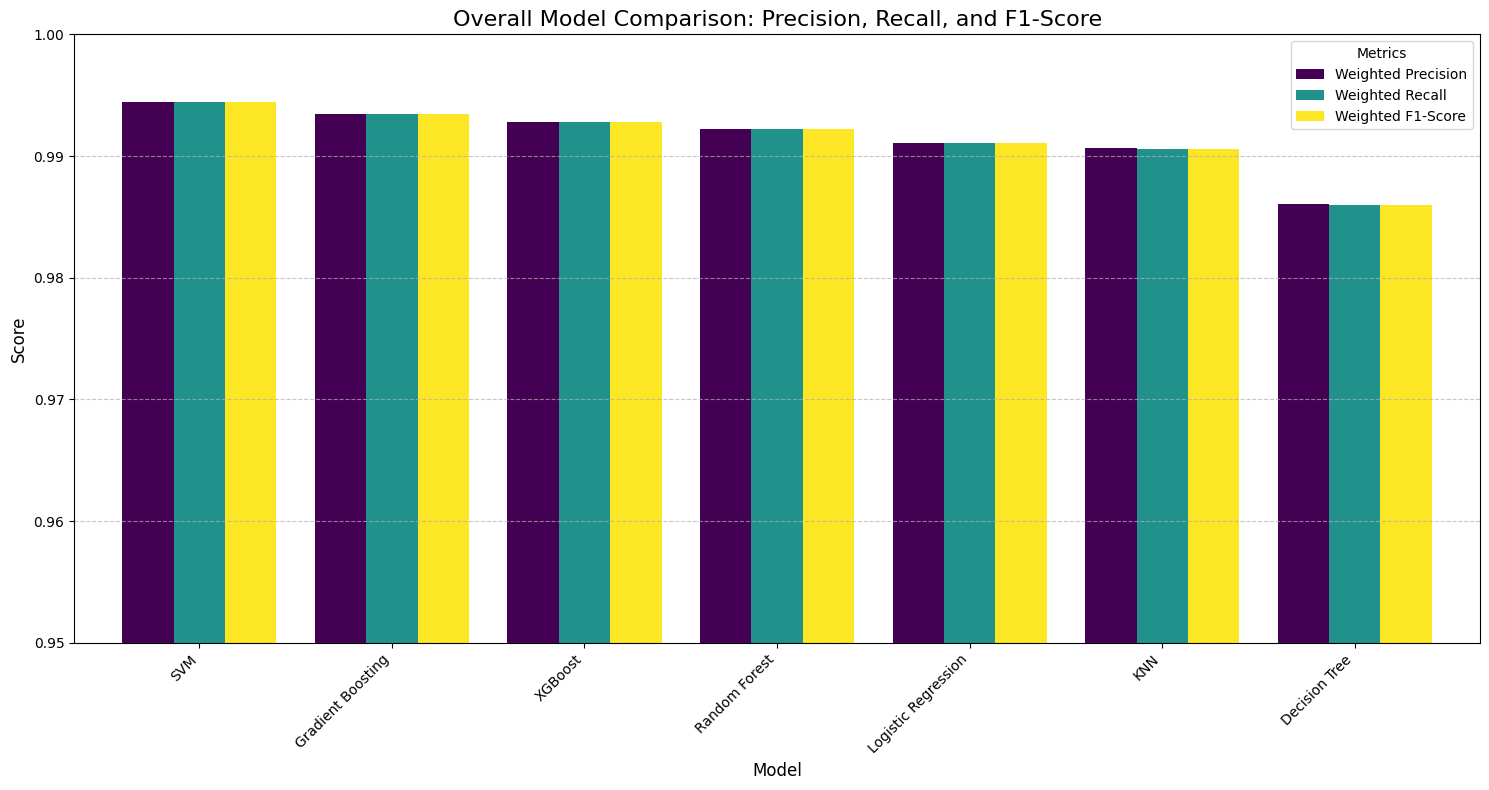

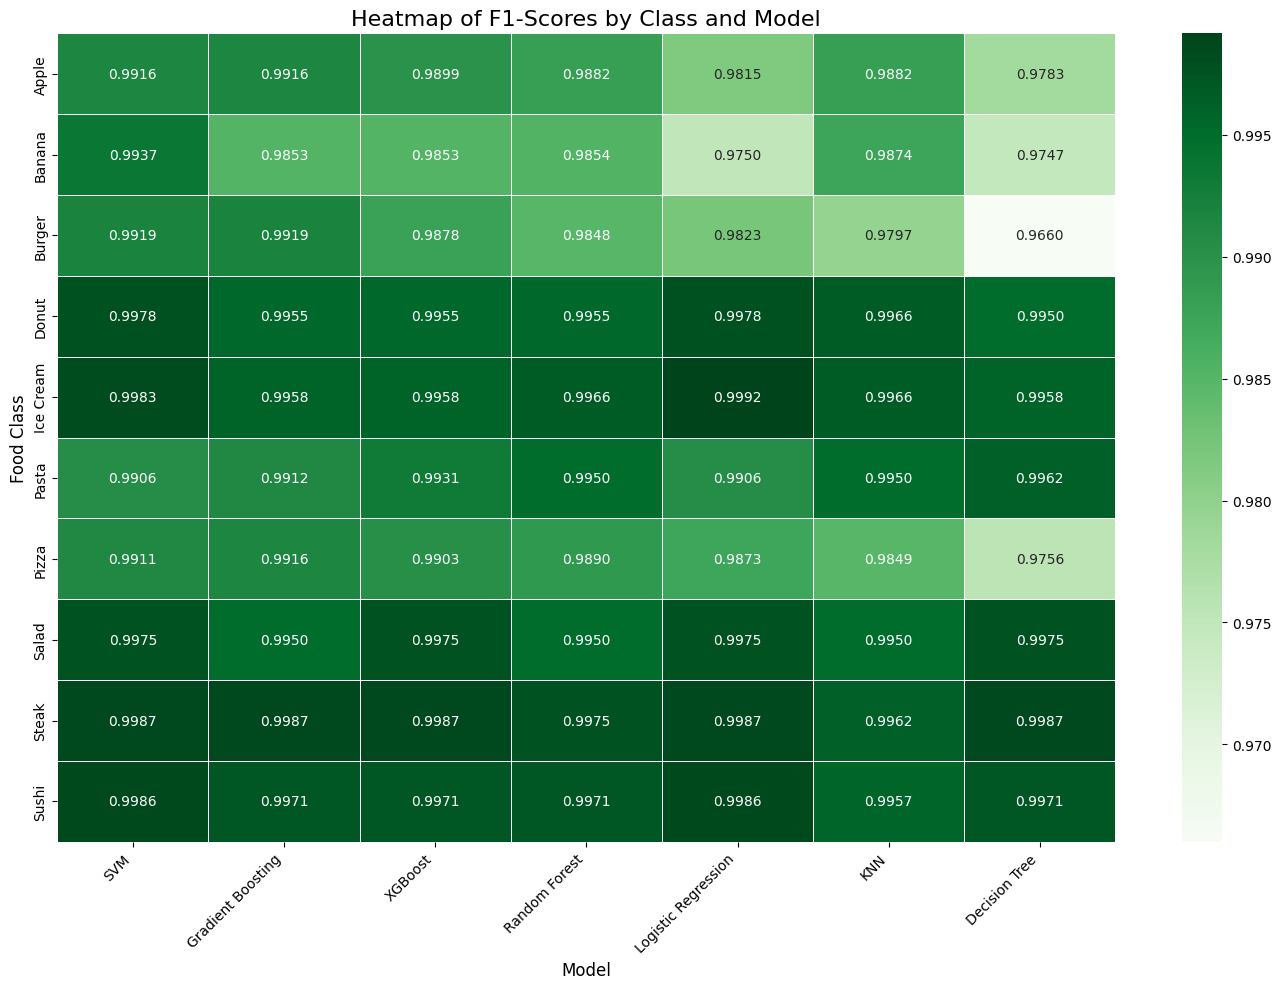

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_comparison_analysis(models):
    """
    Reads all classification reports, generates a summary table,
    an overall performance bar chart, and a per-class performance heatmap.
    """
    
    # --- Part 1: Overall Model Performance Comparison ---
    
    overall_metrics_list = []
    
    for model in models:
        report_file = f"model_results/classification_report_{model}.csv"
        try:
            # Read the classification report
            report_df = pd.read_csv(report_file, index_col=0)
            
            # Extract weighted averages and accuracy
            weighted_avg = report_df.loc['weighted avg']
            accuracy = report_df.loc['accuracy', 'precision'] # Accuracy is stored in this cell
            
            overall_metrics_list.append({
                'Model': model.replace('_', ' '),
                'Accuracy': accuracy,
                'Weighted Precision': weighted_avg['precision'],
                'Weighted Recall': weighted_avg['recall'],
                'Weighted F1-Score': weighted_avg['f1-score']
            })
            
        except FileNotFoundError:
            print(f"Warning: Could not find {report_file}. Skipping this model.")
            continue
            
    # Convert list to DataFrame for analysis and plotting
    results_df = pd.DataFrame(overall_metrics_list).set_index('Model')
    results_df = results_df.sort_values(by='Weighted F1-Score', ascending=False)
    
    print("--- Overall Model Performance ---")
    print(results_df)
    
    # --- Plot 1: Grouped Bar Chart for Overall Metrics ---
    
    plot_df = results_df[['Weighted Precision', 'Weighted Recall', 'Weighted F1-Score']]
    ax = plot_df.plot(kind='bar', figsize=(15, 8), width=0.8, colormap='viridis')
    
    plt.title('Overall Model Comparison: Precision, Recall, and F1-Score', fontsize=16)
    plt.ylabel('Score', fontsize=12)
    plt.xlabel('Model', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Metrics')
    plt.ylim(0.95, 1.0) # Zoom in on the top scores to see differences
    plt.tight_layout()
    
    #plt.savefig('overall_model_comparison.png')
    #print("\nSaved overall comparison chart to 'overall_model_comparison.png'")

    
    # --- Part 2: Per-Class F1-Score Comparison ---
    
    class_f1_scores = {}
    
    for model in models:
        report_file = f"model_results/classification_report_{model}.csv"
        try:
            report_df = pd.read_csv(report_file, index_col=0)
            # Drop the summary rows to get only the classes
            class_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])
            # Store the f1-score for each class under the model's name
            class_f1_scores[model.replace('_', ' ')] = class_df['f1-score']
        except FileNotFoundError:
            continue
            
    # Create a DataFrame from the dictionary of class F1-scores
    class_f1_df = pd.DataFrame(class_f1_scores)
    # Ensure the best models are on the left for easier comparison
    class_f1_df = class_f1_df[results_df.index]
    
    print("\n\n--- F1-Scores for Each Class by Model ---")
    print(class_f1_df)
    
    # --- Plot 2: Heatmap for Per-Class F1-Scores ---
    
    plt.figure(figsize=(14, 10))
    sns.heatmap(class_f1_df, annot=True, fmt=".4f", cmap="Greens", linewidths=.5)
    
    plt.title('Heatmap of F1-Scores by Class and Model', fontsize=16)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Food Class', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    


# --- Main Execution ---

if __name__ == '__main__':
    # List of the base names for your models
    model_names = [
        "Logistic_Regression",
        "Decision_Tree",
        "Random_Forest",
        "KNN",
        "SVM",
        "XGBoost",
        "Gradient_Boosting"
    ]
    
    generate_comparison_analysis(model_names)
    print("\n\nAnalysis complete.")